## *Read Given Data & Data Preprocessing*

In [2]:
import numpy as np
import pandas as pd

In [3]:
mutual_fund = pd.read_csv("/Users/daham/Desktop/Quantitative Investment/good_projects_for_git/Replicate_Mutual_funds/Mutual_Fund_Returns.csv")


In [4]:
mutual_fund.head()

,crsp_fundno,date,mtna,mret,mnav,ticker,tm
0,5270,31jan2000,10.1,-0.052530,14.79,APIMX,2000m1
1,5270,29feb2000,10.7,0.037187,15.34,APIMX,2000m2
2,5270,31mar2000,11.6,0.059974,16.26,APIMX,2000m3
3,5270,28apr2000,11.7,-0.041205,15.59,APIMX,2000m4
4,5270,31may2000,11.4,-0.035279,15.04,APIMX,2000m5


In [5]:
import re
months_dict = {'jan':'01','feb':'02','mar':'03','apr':'04','may':'05','jun':'06','jul':'07','aug':'08','sep':'09','oct':'10','nov':'11','dec':'12' }
    

In [6]:
def word_to_num_date(word_date):
    algorithm=re.compile(r'(?P<day>[0-9]+)(?P<month>[a-z]+)(?P<year>[0-9]+)')
    day = algorithm.search(word_date).group('day')
    month = months_dict[algorithm.search(word_date).group('month')]
    year = algorithm.search(word_date).group('year')
    return pd.to_datetime((year+month+day))

In [7]:
mutual_fund.loc[:, 'date'] = mutual_fund.loc[:, 'date'].map(word_to_num_date)


In [8]:
mutual_fund.loc[:, 'mret'] = mutual_fund.loc[:, 'mret'].map(lambda x : x*100)


In [9]:
# NAV (Net Asset Value) = (assets - liabilities) / number of outstanding shares


In [10]:
mutual_fund.head()

,crsp_fundno,date,mtna,mret,mnav,ticker,tm
0,5270,2000-01-31,10.1,-5.25304,14.79,APIMX,2000m1
1,5270,2000-02-29,10.7,3.71873,15.34,APIMX,2000m2
2,5270,2000-03-31,11.6,5.99739,16.26,APIMX,2000m3
3,5270,2000-04-28,11.7,-4.12054,15.59,APIMX,2000m4
4,5270,2000-05-31,11.4,-3.52790,15.04,APIMX,2000m5


In [11]:
mutual_fund.loc[mutual_fund['ticker']=='YACKX'].tail()

,crsp_fundno,date,mtna,mret,mnav,ticker,tm
2371,32555,2017-08-31,8465.1,-0.50912,23.45,YACKX,2017m8
2372,32555,2017-09-29,8487.7,0.34115,23.53,YACKX,2017m9
2373,32555,2017-10-31,8573.1,1.99745,24.00,YACKX,2017m10
2374,32555,2017-11-30,8805.4,3.54167,24.85,YACKX,2017m11
2375,32555,2017-12-29,8728.8,1.76848,22.85,YACKX,2017m12


In [12]:
mutual_fund.loc[mutual_fund['ticker']=='YAFFX'].tail()

,crsp_fundno,date,mtna,mret,mnav,ticker,tm
2587,32556,2017-08-31,3162.1,-0.95411,21.80,YAFFX,2017m8
2588,32556,2017-09-29,2988.8,0.27523,21.86,YAFFX,2017m9
2589,32556,2017-10-31,2759.4,1.78408,22.25,YAFFX,2017m10
2590,32556,2017-11-30,2821.1,3.91011,23.12,YAFFX,2017m11
2591,32556,2017-12-29,2803.7,2.22329,21.13,YAFFX,2017m12


## *Read Fama-French factors*

In [13]:
dateparser = lambda x: pd.datetime.strptime(x, '%Y%m')

In [14]:
dateparser('201601')

datetime.datetime(2016, 1, 1, 0, 0)

In [15]:
fama_french_df = pd.read_csv('/Users/daham/Desktop/Quantitative Investment/good_projects_for_git/Replicate_Mutual_funds/F-F_Research_Data_Factors.csv', skiprows=3, skipfooter=95, engine='python', index_col=0, parse_dates=True, date_parser=dateparser)


In [16]:
fama_french = fama_french_df[882:-2]
fama_french.head()

,Mkt-RF,SMB,HML,RF
2000-01-01,-4.74,5.05,-0.45,0.41
2000-02-01,2.45,22.14,-10.57,0.43
2000-03-01,5.20,-17.28,7.94,0.47
2000-04-01,-6.40,-7.71,8.56,0.46
2000-05-01,-4.42,-5.01,2.43,0.50


# *Do Regression*

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/daham/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [18]:
def array_to_dataframe(array1, Mkt_RF_array, SMB_array, HML_array):
    data = np.array([array1, Mkt_RF_array, SMB_array, HML_array]).T
    tmp = pd.DataFrame(data=data, columns=['Excess_rt', 'Mkt_RF', 'SMB', 'HML'])
    return tmp

### *1-a) YACKX return - risk free*

In [19]:
yackx_rf = mutual_fund.loc[mutual_fund['ticker']=='YACKX']['mret'].reset_index(drop=True)-fama_french.loc[:,'RF'].reset_index(drop=True)


In [20]:
yackx_rf.head()

0   -7.43128
1   -7.98149
2    5.71812
3   -4.08150
4    2.77273
dtype: float64

### *1-b) YAFFX return - risk free*

In [21]:
yaffx_rf = mutual_fund.loc[mutual_fund['ticker']=='YAFFX']['mret'].reset_index(drop=True)-fama_french.loc[:,'RF'].reset_index(drop=True)


In [22]:
yaffx_rf.head()

0    -5.43232
1   -11.47583
2     5.60612
3    -5.21000
4     1.99344
dtype: float64

### *2-a) Preparing Regression for YACKX*

In [23]:
yackx_df = array_to_dataframe(yackx_rf, fama_french['Mkt-RF'], fama_french['SMB'], fama_french['HML'])


In [24]:
yackx_df.head()

,Excess_rt,Mkt_RF,SMB,HML
0,-7.43128,-4.74,5.05,-0.45
1,-7.98149,2.45,22.14,-10.57
2,5.71812,5.20,-17.28,7.94
3,-4.08150,-6.40,-7.71,8.56
4,2.77273,-4.42,-5.01,2.43


### *2-b) Preparing Regression for YAFFX*

In [25]:
yaffx_df = array_to_dataframe(yaffx_rf, fama_french['Mkt-RF'], fama_french['SMB'], fama_french['HML'])

In [26]:
yaffx_df.head()

,Excess_rt,Mkt_RF,SMB,HML
0,-5.43232,-4.74,5.05,-0.45
1,-11.47583,2.45,22.14,-10.57
2,5.60612,5.20,-17.28,7.94
3,-5.21000,-6.40,-7.71,8.56
4,1.99344,-4.42,-5.01,2.43


### *3-a) Do Regression for YACKX*

In [27]:
ff_3factor_reg_yackx = smf.ols('Excess_rt ~ Mkt_RF + SMB + HML',data=yackx_df).fit()
ff_3factor_reg_yackx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Excess_rt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     199.7
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           1.73e-61
Time:                        22:15:07   Log-Likelihood:                -464.12
No. Observations:                 216   AIC:                             936.2
Df Residuals:                     212   BIC:                             949.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4553      0.145      3.148      0.002       0.170       0.740
Mkt_RF         0.7893      0.034     23.214      0.000       0.722       0.856
SMB           -0.1130      0.046     -2.479      0.014      -0.203      -0.023
HML            0.3355      0.046      7.246      0.000       0.244       0.427
==============================================================================
Omnibus:                       96.048   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              510.439
Skew:                           1.667   Prob(JB):                    1.44e-111
Kurtosis:                       9.753   Cond. No.                         4.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### * Alpha: 0.4553 ---------- significant
#### * Beta(Mkt-Rf): 0.7893 ---------- significant
#### * Beta(SMB): -0.1130 ---------- significant
#### * Beta(HML): 0.3355 ---------- significant
#### * Adj. R-square: 0.735 

### *3-b) Do Regression for YAFFX*

In [28]:
ff_3factor_reg_yaffx = smf.ols('Excess_rt ~ Mkt_RF + SMB + HML',data=yaffx_df).fit()
ff_3factor_reg_yaffx.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Excess_rt   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     163.5
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           6.74e-55
Time:                        22:15:07   Log-Likelihood:                -489.09
No. Observations:                 216   AIC:                             986.2
Df Residuals:                     212   BIC:                             999.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4695      0.162      2.892      0.004       0.149       0.790
Mkt_RF         0.8106      0.038     21.236      0.000       0.735       0.886
SMB           -0.1565      0.051     -3.059      0.003      -0.257      -0.056
HML            0.3080      0.052      5.926      0.000       0.206       0.410
==============================================================================
Omnibus:                       79.436   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.372
Skew:                           1.361   Prob(JB):                     3.42e-84
Kurtosis:                       8.942   Cond. No.                         4.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### * Alpha: 0.4695 ---------- significant
#### * Beta(Mkt-Rf): 0.8106 ---------- significant
#### * Beta(SMB): -0.1565 ---------- significant
#### * Beta(HML): 0.3080 ---------- significant
#### * Adj. R-square: 0.694

## *Sharpe Ratio*

In [29]:
yackx_avg_return = yackx_df['Excess_rt'].mean()*12
yaffx_avg_return = yaffx_df['Excess_rt'].mean()*12
print("yackx_avg_return: ", yackx_avg_return,'%')
print("yaffx_avg_return: ", yaffx_avg_return,'%\n')

yackx_std = yackx_df['Excess_rt'].std()*np.sqrt(12)
yaffx_std = yaffx_df['Excess_rt'].std()*np.sqrt(12)
print("yackx_std: ", yackx_std,'%')
print("yaffx_std: ", yaffx_std,'%\n')

yackx_sharpe_ratio = yackx_avg_return/yackx_std
yaffx_sharpe_ratio = yaffx_avg_return/yaffx_std
print("yackx_sharpe_ratio: ", yackx_sharpe_ratio)
print("yaffx_sharpe_ratio: ", yaffx_sharpe_ratio)

yackx_avg_return:  10.5019111111 %
yaffx_avg_return:  10.5252622222 %

yackx_std:  14.088139063 %
yaffx_std:  14.7208868046 %

yackx_sharpe_ratio:  0.745443458796
yaffx_sharpe_ratio:  0.714988326583


## *Compare Other Mutual Funds*

In [30]:
mutual_fund['ticker'].unique()

array(['APIMX', 'GWETX', 'FSTMX', 'FFFEX', 'FMTIX', 'VADAX', 'NBGUX',
       'SWTSX', 'TVAFX', 'BPEQX', 'YACKX', 'YAFFX'], dtype=object)

In [31]:
apimx_rf = mutual_fund.loc[mutual_fund['ticker']=='APIMX']['mret'].reset_index(drop=True)-fama_french.loc[:,'RF'].reset_index(drop=True)
gwetx_rf = mutual_fund.loc[mutual_fund['ticker']=='GWETX']['mret'].reset_index(drop=True)-fama_french.loc[:,'RF'].reset_index(drop=True)
fstmx_rf = mutual_fund.loc[mutual_fund['ticker']=='FSTMX']['mret'].reset_index(drop=True)-fama_french.loc[:,'RF'].reset_index(drop=True)
fffex_rf = mutual_fund.loc[mutual_fund['ticker']=='FFFEX']['mret'].reset_index(drop=True)-fama_french.loc[:,'RF'].reset_index(drop=True)
fmtix_rf = mutual_fund.loc[mutual_fund['ticker']=='FMTIX']['mret'].reset_index(drop=True)-fama_french.loc[:,'RF'].reset_index(drop=True)
vadax_rf = mutual_fund.loc[mutual_fund['ticker']=='VADAX']['mret'].reset_index(drop=True)-fama_french.loc[:,'RF'].reset_index(drop=True)
nbgux_rf = mutual_fund.loc[mutual_fund['ticker']=='NBGUX']['mret'].reset_index(drop=True)-fama_french.loc[:,'RF'].reset_index(drop=True)
swtsx_rf = mutual_fund.loc[mutual_fund['ticker']=='SWTSX']['mret'].reset_index(drop=True)-fama_french.loc[:,'RF'].reset_index(drop=True)
tvafx_rf = mutual_fund.loc[mutual_fund['ticker']=='TVAFX']['mret'].reset_index(drop=True)-fama_french.loc[:,'RF'].reset_index(drop=True)
bpeqx_rf = mutual_fund.loc[mutual_fund['ticker']=='BPEQX']['mret'].reset_index(drop=True)-fama_french.loc[:,'RF'].reset_index(drop=True)


### *Shapre Ratios of other mutual funds*

In [32]:
def sharpe_ratio_calculator(excess_return):
    return (excess_return.mean()*12) / (excess_return.std()*np.sqrt(12)) 

In [33]:
apix_sharpe_ratio = sharpe_ratio_calculator(apimx_rf)
gwetx_sharpe_ratio = sharpe_ratio_calculator(gwetx_rf)
fstmx_sharpe_ratio = sharpe_ratio_calculator(fstmx_rf)
fffex_sharpe_ratio = sharpe_ratio_calculator(fffex_rf)
fmtix_sharpe_ratio = sharpe_ratio_calculator(fmtix_rf)
vadax_sharpe_ratio = sharpe_ratio_calculator(vadax_rf)
nbgux_sharpe_ratio = sharpe_ratio_calculator(nbgux_rf)
swtsx_sharpe_ratio = sharpe_ratio_calculator(swtsx_rf)
tvafx_sharpe_ratio = sharpe_ratio_calculator(tvafx_rf)
bpeqx_sharpe_ratio = sharpe_ratio_calculator(bpeqx_rf)

print("apix_sharpe_ratio: ", apix_sharpe_ratio)
print("gwetx_sharpe_ratio: ", gwetx_sharpe_ratio)
print("fstmx_sharpe_ratio: ", fstmx_sharpe_ratio)
print("fffex_sharpe_ratio: ", fffex_sharpe_ratio)
print("fmtix_sharpe_ratio: ", fmtix_sharpe_ratio)
print("vadax_sharpe_ratio: ", vadax_sharpe_ratio)
print("nbgux_sharpe_ratio: ", nbgux_sharpe_ratio)
print("swtsx_sharpe_ratio: ", swtsx_sharpe_ratio)
print("tvafx_sharpe_ratio: ", tvafx_sharpe_ratio)
print("bpeqx_sharpe_ratio: ", bpeqx_sharpe_ratio)


apix_sharpe_ratio:  0.0611210145437
gwetx_sharpe_ratio:  0.352569289924
fstmx_sharpe_ratio:  0.34404718982
fffex_sharpe_ratio:  0.280147648649
fmtix_sharpe_ratio:  0.417890081558
vadax_sharpe_ratio:  0.500136048144
nbgux_sharpe_ratio:  0.352045374435
swtsx_sharpe_ratio:  0.352227142045
tvafx_sharpe_ratio:  0.33801522701
bpeqx_sharpe_ratio:  0.401619846493


In [34]:
mutual_funds_dict={'yackx': yackx_sharpe_ratio 
                    ,'yaffx': yaffx_sharpe_ratio
                    ,'apix': apix_sharpe_ratio
                    ,'gwetx': gwetx_sharpe_ratio
                    ,'fstmx': fstmx_sharpe_ratio
                    ,'fffex': fffex_sharpe_ratio
                    ,'fmtix': fmtix_sharpe_ratio
                    ,'vadax': vadax_sharpe_ratio
                    ,'nbgux': nbgux_sharpe_ratio
                    ,'swtsx': swtsx_sharpe_ratio
                    ,'tvafx': tvafx_sharpe_ratio
                    ,'bpeqx': bpeqx_sharpe_ratio}

In [35]:
rank_sharpe_ratio = sorted(mutual_funds_dict.items(), key=lambda x: x[1], reverse=True)

In [36]:
rank_sharpe_ratio

[('yackx', 0.7454434587964035),
 ('yaffx', 0.71498832658347111),
 ('vadax', 0.50013604814382673),
 ('fmtix', 0.41789008155759377),
 ('bpeqx', 0.40161984649335786),
 ('gwetx', 0.35256928992412351),
 ('swtsx', 0.35222714204478706),
 ('nbgux', 0.35204537443456452),
 ('fstmx', 0.34404718981994881),
 ('tvafx', 0.3380152270101488),
 ('fffex', 0.28014764864902542),
 ('apix', 0.061121014543707872)]

## *Comparing two periods 2000~2009 / 2009~2017 *

In [37]:
fama_1st_half = fama_french[:108]
fama_2nd_half = fama_french[108:]

#### *YACKX return - risk free(1st hf, 2nd hf) & YAFFX return - risk free(1st hf, 2nd hf)* 

In [38]:
yackx_rf_1st_hf = mutual_fund[mutual_fund['ticker']=='YACKX']['mret'][:108].reset_index(drop=True)-fama_1st_half.loc[:,'RF'].reset_index(drop=True)
yackx_rf_2nd_hf = mutual_fund[mutual_fund['ticker']=='YACKX']['mret'][108:].reset_index(drop=True)-fama_2nd_half.loc[:,'RF'].reset_index(drop=True)

yaffx_rf_1st_hf = mutual_fund[mutual_fund['ticker']=='YAFFX']['mret'][:108].reset_index(drop=True)-fama_1st_half.loc[:,'RF'].reset_index(drop=True)
yaffx_rf_2nd_hf = mutual_fund[mutual_fund['ticker']=='YAFFX']['mret'][108:].reset_index(drop=True)-fama_2nd_half.loc[:,'RF'].reset_index(drop=True)


#### *Do regression of **YACKX** (1st hf, 2nd hf) and **YAFFX** (1st hf, 2nd hf)*


In [39]:
yackx_1st_df = array_to_dataframe(yackx_rf_1st_hf, fama_1st_half['Mkt-RF'], fama_1st_half['SMB'], fama_1st_half['HML'])
yackx_2nd_df = array_to_dataframe(yackx_rf_2nd_hf, fama_2nd_half['Mkt-RF'], fama_2nd_half['SMB'], fama_2nd_half['HML'])

yaffx_1st_df = array_to_dataframe(yaffx_rf_1st_hf, fama_1st_half['Mkt-RF'], fama_1st_half['SMB'], fama_1st_half['HML'])
yaffx_2nd_df = array_to_dataframe(yaffx_rf_2nd_hf, fama_2nd_half['Mkt-RF'], fama_2nd_half['SMB'], fama_2nd_half['HML'])


In [40]:
ff_3factor_reg_yackx_1st = smf.ols('Excess_rt ~ Mkt_RF + SMB + HML',data=yackx_1st_df).fit()
ff_3factor_reg_yackx_2nd = smf.ols('Excess_rt ~ Mkt_RF + SMB + HML',data=yackx_2nd_df).fit()
ff_3factor_reg_yaffx_1st = smf.ols('Excess_rt ~ Mkt_RF + SMB + HML',data=yaffx_1st_df).fit()
ff_3factor_reg_yaffx_2nd = smf.ols('Excess_rt ~ Mkt_RF + SMB + HML',data=yaffx_2nd_df).fit()

ff_3factor_reg_yackx_1st.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Excess_rt   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     78.60
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           1.26e-26
Time:                        22:15:11   Log-Likelihood:                -240.59
No. Observations:                 108   AIC:                             489.2
Df Residuals:                     104   BIC:                             499.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4998      0.231      2.164      0.033       0.042       0.958
Mkt_RF         0.7804      0.051     15.195      0.000       0.679       0.882
SMB           -0.0633      0.061     -1.039      0.301      -0.184       0.057
HML            0.4044      0.072      5.616      0.000       0.262       0.547
==============================================================================
Omnibus:                       10.741   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.942
Skew:                           0.694   Prob(JB):                      0.00421
Kurtosis:                       3.709   Cond. No.                         5.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### *YACKX 1st half (2000~2009)*
#### * Alpha: 0.4998 ---------- significant
#### * Beta(Mkt-Rf): 0.7804 ---------- significant
#### * Beta(SMB): -0.0633 ---------- insignificant
#### * Beta(HML): 0.4044 ---------- significant
#### * Adj. R-square: 0.685

In [41]:
ff_3factor_reg_yackx_2nd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Excess_rt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           1.53e-35
Time:                        22:15:11   Log-Likelihood:                -217.94
No. Observations:                 108   AIC:                             443.9
Df Residuals:                     104   BIC:                             454.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2223      0.191      1.166      0.246      -0.156       0.600
Mkt_RF         0.8769      0.052     16.886      0.000       0.774       0.980
SMB           -0.2064      0.083     -2.490      0.014      -0.371      -0.042
HML            0.2072      0.072      2.872      0.005       0.064       0.350
==============================================================================
Omnibus:                      121.745   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2800.856
Skew:                           3.717   Prob(JB):                         0.00
Kurtosis:                      26.815   Cond. No.                         4.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### *YACKX 2nd half (2009~2017)*
#### * Alpha: 0.2223 ---------- insignificant
#### * Beta(Mkt-Rf): 0.8769 ---------- significant
#### * Beta(SMB): -0.2064 ---------- insignificant
#### * Beta(HML): 0.2072 ---------- significant
#### * Adj. R-square: 0.794

In [42]:
ff_3factor_reg_yaffx_1st.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Excess_rt   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     70.02
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           7.40e-25
Time:                        22:15:11   Log-Likelihood:                -251.38
No. Observations:                 108   AIC:                             510.8
Df Residuals:                     104   BIC:                             521.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5346      0.255      2.094      0.039       0.028       1.041
Mkt_RF         0.8162      0.057     14.381      0.000       0.704       0.929
SMB           -0.1100      0.067     -1.634      0.105      -0.243       0.024
HML            0.3845      0.080      4.832      0.000       0.227       0.542
==============================================================================
Omnibus:                        2.206   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.332   Jarque-Bera (JB):                1.635
Skew:                           0.253   Prob(JB):                        0.441
Kurtosis:                       3.329   Cond. No.                         5.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### *YAFFX 1st half (2000~2009)*
#### * Alpha: 0.5346 ---------- significant
#### * Beta(Mkt-Rf): 0.8162 ---------- significant
#### * Beta(SMB): -0.1100 ---------- insignificant
#### * Beta(HML): 0.3845 ---------- significant
#### * Adj. R-square: 0.659

In [43]:
ff_3factor_reg_yaffx_2nd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Excess_rt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     97.43
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           4.34e-30
Time:                        22:15:12   Log-Likelihood:                -233.87
No. Observations:                 108   AIC:                             475.7
Df Residuals:                     104   BIC:                             486.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2373      0.221      1.075      0.285      -0.201       0.675
Mkt_RF         0.8810      0.060     14.640      0.000       0.762       1.000
SMB           -0.2324      0.096     -2.420      0.017      -0.423      -0.042
HML            0.1784      0.084      2.133      0.035       0.013       0.344
==============================================================================
Omnibus:                      111.283   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1964.525
Skew:                           3.344   Prob(JB):                         0.00
Kurtosis:                      22.795   Cond. No.                         4.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### *YAFFX 2nd half (2009~2017)*
#### * Alpha: 0.2373 ---------- insignificant
#### * Beta(Mkt-Rf): 0.8810 ---------- significant
#### * Beta(SMB): -0.2324 ---------- significant
#### * Beta(HML): 0.1784 ---------- significant
#### * Adj. R-square: 0.730

## *Sharpe Ratio of all mutual funds*

In [44]:

# 1st half
apimx_rf_1st_hf = mutual_fund.loc[mutual_fund['ticker']=='APIMX']['mret'][:108].reset_index(drop=True)-fama_1st_half.loc[:,'RF'].reset_index(drop=True)
gwetx_rf_1st_hf = mutual_fund.loc[mutual_fund['ticker']=='GWETX']['mret'][:108].reset_index(drop=True)-fama_1st_half.loc[:,'RF'].reset_index(drop=True)
fstmx_rf_1st_hf = mutual_fund.loc[mutual_fund['ticker']=='FSTMX']['mret'][:108].reset_index(drop=True)-fama_1st_half.loc[:,'RF'].reset_index(drop=True)
fffex_rf_1st_hf = mutual_fund.loc[mutual_fund['ticker']=='FFFEX']['mret'][:108].reset_index(drop=True)-fama_1st_half.loc[:,'RF'].reset_index(drop=True)
fmtix_rf_1st_hf = mutual_fund.loc[mutual_fund['ticker']=='FMTIX']['mret'][:108].reset_index(drop=True)-fama_1st_half.loc[:,'RF'].reset_index(drop=True)
vadax_rf_1st_hf = mutual_fund.loc[mutual_fund['ticker']=='VADAX']['mret'][:108].reset_index(drop=True)-fama_1st_half.loc[:,'RF'].reset_index(drop=True)
nbgux_rf_1st_hf = mutual_fund.loc[mutual_fund['ticker']=='NBGUX']['mret'][:108].reset_index(drop=True)-fama_1st_half.loc[:,'RF'].reset_index(drop=True)
swtsx_rf_1st_hf = mutual_fund.loc[mutual_fund['ticker']=='SWTSX']['mret'][:108].reset_index(drop=True)-fama_1st_half.loc[:,'RF'].reset_index(drop=True)
tvafx_rf_1st_hf = mutual_fund.loc[mutual_fund['ticker']=='TVAFX']['mret'][:108].reset_index(drop=True)-fama_1st_half.loc[:,'RF'].reset_index(drop=True)
bpeqx_rf_1st_hf = mutual_fund.loc[mutual_fund['ticker']=='BPEQX']['mret'][:108].reset_index(drop=True)-fama_1st_half.loc[:,'RF'].reset_index(drop=True)

# 2nd half
apimx_rf_2nd_hf = mutual_fund.loc[mutual_fund['ticker']=='APIMX']['mret'][108:].reset_index(drop=True)-fama_2nd_half.loc[:,'RF'].reset_index(drop=True)
gwetx_rf_2nd_hf = mutual_fund.loc[mutual_fund['ticker']=='GWETX']['mret'][108:].reset_index(drop=True)-fama_2nd_half.loc[:,'RF'].reset_index(drop=True)
fstmx_rf_2nd_hf = mutual_fund.loc[mutual_fund['ticker']=='FSTMX']['mret'][108:].reset_index(drop=True)-fama_2nd_half.loc[:,'RF'].reset_index(drop=True)
fffex_rf_2nd_hf = mutual_fund.loc[mutual_fund['ticker']=='FFFEX']['mret'][108:].reset_index(drop=True)-fama_2nd_half.loc[:,'RF'].reset_index(drop=True)
fmtix_rf_2nd_hf = mutual_fund.loc[mutual_fund['ticker']=='FMTIX']['mret'][108:].reset_index(drop=True)-fama_2nd_half.loc[:,'RF'].reset_index(drop=True)
vadax_rf_2nd_hf = mutual_fund.loc[mutual_fund['ticker']=='VADAX']['mret'][108:].reset_index(drop=True)-fama_2nd_half.loc[:,'RF'].reset_index(drop=True)
nbgux_rf_2nd_hf = mutual_fund.loc[mutual_fund['ticker']=='NBGUX']['mret'][108:].reset_index(drop=True)-fama_2nd_half.loc[:,'RF'].reset_index(drop=True)
swtsx_rf_2nd_hf = mutual_fund.loc[mutual_fund['ticker']=='SWTSX']['mret'][108:].reset_index(drop=True)-fama_2nd_half.loc[:,'RF'].reset_index(drop=True)
tvafx_rf_2nd_hf = mutual_fund.loc[mutual_fund['ticker']=='TVAFX']['mret'][108:].reset_index(drop=True)-fama_2nd_half.loc[:,'RF'].reset_index(drop=True)
bpeqx_rf_2nd_hf = mutual_fund.loc[mutual_fund['ticker']=='BPEQX']['mret'][108:].reset_index(drop=True)-fama_2nd_half.loc[:,'RF'].reset_index(drop=True)


In [45]:
# sharpe ratios of 1st halves
yackx_sharpe_ratio_1st = sharpe_ratio_calculator(yackx_rf_1st_hf)
yaffx_sharpe_ratio_1st = sharpe_ratio_calculator(yaffx_rf_1st_hf)
apix_sharpe_ratio_1st = sharpe_ratio_calculator(apimx_rf_1st_hf)
gwetx_sharpe_ratio_1st = sharpe_ratio_calculator(gwetx_rf_1st_hf)
fstmx_sharpe_ratio_1st = sharpe_ratio_calculator(fstmx_rf_1st_hf)
fffex_sharpe_ratio_1st = sharpe_ratio_calculator(fffex_rf_1st_hf)
fmtix_sharpe_ratio_1st = sharpe_ratio_calculator(fmtix_rf_1st_hf)
vadax_sharpe_ratio_1st = sharpe_ratio_calculator(vadax_rf_1st_hf)
nbgux_sharpe_ratio_1st = sharpe_ratio_calculator(nbgux_rf_1st_hf)
swtsx_sharpe_ratio_1st = sharpe_ratio_calculator(swtsx_rf_1st_hf)
tvafx_sharpe_ratio_1st = sharpe_ratio_calculator(tvafx_rf_1st_hf)
bpeqx_sharpe_ratio_1st = sharpe_ratio_calculator(bpeqx_rf_1st_hf)


In [46]:
# sharpe ratios of 2nd halves
yackx_sharpe_ratio_2nd = sharpe_ratio_calculator(yackx_rf_2nd_hf)
yaffx_sharpe_ratio_2nd = sharpe_ratio_calculator(yaffx_rf_2nd_hf)
apix_sharpe_ratio_2nd = sharpe_ratio_calculator(apimx_rf_2nd_hf)
gwetx_sharpe_ratio_2nd = sharpe_ratio_calculator(gwetx_rf_2nd_hf)
fstmx_sharpe_ratio_2nd = sharpe_ratio_calculator(fstmx_rf_2nd_hf)
fffex_sharpe_ratio_2nd = sharpe_ratio_calculator(fffex_rf_2nd_hf)
fmtix_sharpe_ratio_2nd = sharpe_ratio_calculator(fmtix_rf_2nd_hf)
vadax_sharpe_ratio_2nd = sharpe_ratio_calculator(vadax_rf_2nd_hf)
nbgux_sharpe_ratio_2nd = sharpe_ratio_calculator(nbgux_rf_2nd_hf)
swtsx_sharpe_ratio_2nd = sharpe_ratio_calculator(swtsx_rf_2nd_hf)
tvafx_sharpe_ratio_2nd = sharpe_ratio_calculator(tvafx_rf_2nd_hf)
bpeqx_sharpe_ratio_2nd = sharpe_ratio_calculator(bpeqx_rf_2nd_hf)


In [47]:
mutual_funds_dict_2halves={'yackx_1st': yackx_sharpe_ratio_1st 
                            ,'yaffx_1st': yaffx_sharpe_ratio_1st
                            ,'apix_1st': apix_sharpe_ratio_1st
                            ,'gwetx_1st': gwetx_sharpe_ratio_1st
                            ,'fstmx_1st': fstmx_sharpe_ratio_1st
                            ,'fffex_1st': fffex_sharpe_ratio_1st
                            ,'fmtix_1st': fmtix_sharpe_ratio_1st
                            ,'vadax_1st': vadax_sharpe_ratio_1st
                            ,'nbgux_1st': nbgux_sharpe_ratio_1st
                            ,'swtsx_1st': swtsx_sharpe_ratio_1st
                            ,'tvafx_1st': tvafx_sharpe_ratio_1st
                            ,'bpeqx_1st': bpeqx_sharpe_ratio_1st
                            ,'yackx_2nd': yackx_sharpe_ratio_2nd 
                            ,'yaffx_2nd': yaffx_sharpe_ratio_2nd
                            ,'apix_2nd': apix_sharpe_ratio_2nd
                            ,'gwetx_2nd': gwetx_sharpe_ratio_2nd
                            ,'fstmx_2nd': fstmx_sharpe_ratio_2nd
                            ,'fffex_2nd': fffex_sharpe_ratio_2nd
                            ,'fmtix_2nd': fmtix_sharpe_ratio_2nd
                            ,'vadax_2nd': vadax_sharpe_ratio_2nd
                            ,'nbgux_2nd': nbgux_sharpe_ratio_2nd
                            ,'swtsx_2nd': swtsx_sharpe_ratio_2nd
                            ,'tvafx_2nd': tvafx_sharpe_ratio_2nd
                            ,'bpeqx_2nd': bpeqx_sharpe_ratio_2nd}


In [48]:
# each of the two period
rank_sharpe_ratio_2halves = sorted(mutual_funds_dict_2halves.items(), key=lambda x: x[1], reverse=True)
rank_sharpe_ratio_2halves

[('yackx_2nd', 1.1228088604786117),
 ('swtsx_2nd', 1.1165249128240062),
 ('yaffx_2nd', 1.1100221085148272),
 ('fstmx_2nd', 1.1055135370473612),
 ('vadax_2nd', 1.0784553098569287),
 ('gwetx_2nd', 1.0769833454919329),
 ('nbgux_2nd', 1.0358106783869594),
 ('fmtix_2nd', 1.0351471439026578),
 ('fffex_2nd', 0.97691001079724504),
 ('bpeqx_2nd', 0.95019093310176761),
 ('tvafx_2nd', 0.88492784975585748),
 ('apix_2nd', 0.59204656900007879),
 ('yackx_1st', 0.37743101627269493),
 ('yaffx_1st', 0.34264537876268769),
 ('fmtix_1st', -0.037381489877926902),
 ('vadax_1st', -0.051071795464584166),
 ('bpeqx_1st', -0.12886949997246669),
 ('nbgux_1st', -0.18628007433217678),
 ('tvafx_1st', -0.22866805662218428),
 ('apix_1st', -0.24952105192502458),
 ('fffex_1st', -0.28446907579511116),
 ('gwetx_1st', -0.28455386984138942),
 ('swtsx_1st', -0.30779387575664607),
 ('fstmx_1st', -0.31158743064694161)]

In [49]:
# over the two period
rank_sharpe_ratio

[('yackx', 0.7454434587964035),
 ('yaffx', 0.71498832658347111),
 ('vadax', 0.50013604814382673),
 ('fmtix', 0.41789008155759377),
 ('bpeqx', 0.40161984649335786),
 ('gwetx', 0.35256928992412351),
 ('swtsx', 0.35222714204478706),
 ('nbgux', 0.35204537443456452),
 ('fstmx', 0.34404718981994881),
 ('tvafx', 0.3380152270101488),
 ('fffex', 0.28014764864902542),
 ('apix', 0.061121014543707872)]

## *Results*

**Performance seems little bit different but "YACKX" is always good in both situations (1st half and 2nd half).**

# *Comparing replicated portfolio & Mutual Funds*

### *check out "holding"*

In [51]:
holding = pd.read_csv("/Users/daham/Desktop/Quantitative Investment/good_projects_for_git/Replicate_Mutual_funds/Holding.csv")

In [52]:
holding.tail()

,cusip,shares,tm,date
3779,90297330,5250055,2016m12,30dec2016
3780,90478470,3472912,2016m12,30dec2016
3781,92553P20,4278238,2016m12,30dec2016
3782,93114210,1069740,2016m12,30dec2016
3783,94974610,1990082,2016m12,30dec2016


In [53]:
len(holding)

3784

### *check out "stock_return"*

In [54]:
stock_return = pd.read_csv("/Users/daham/Desktop/Quantitative Investment/good_projects_for_git/Replicate_Mutual_funds/Stock_Return.csv")


In [55]:
len(stock_return)

11346

In [56]:
# fill '0' which has no return value
stock_return.loc[stock_return.loc[:,'ret'].isnull() ,'ret'] =0

In [57]:
# drop the data which has no price value
# stock_return.dropna(subset=['price'], inplace=True)

In [58]:
#stock_return.dropna(subset=['ret'], inplace=True)

In [59]:
len(stock_return)

11346

### *Merge "holding" & "stock return"*

In [60]:
merge = pd.merge(holding, stock_return, on=['cusip', 'tm'], how='outer')

In [61]:
len(merge)

11346

### *Data pre-processing*

In [62]:
from datetime import date, datetime

In [63]:
def year_m_month_to_num_date(word_date):
    algorithm=re.compile(r'(?P<year>[0-9]+)m(?P<month>[0-9]+)')
    month = algorithm.search(word_date).group('month')
    year = algorithm.search(word_date).group('year')
    return date(int(year),int(month),25)

In [64]:
merge['tm'] = merge['tm'].map(year_m_month_to_num_date)

In [65]:
merge.sort_values(['cusip', 'tm'], inplace=True)

In [66]:
merge['shares'].fillna(method='backfill', limit=2, inplace=True)

In [67]:
# drop the data which doesn't have "shares" despite of data filling.
# ex) preceeding 2 months are filled by every quarter's share numbers.
# The number of shares of Jan, Feb are filled by the number of shares of March(1st quarter).
# However, there is no filling way for July if the number of shares of September(3rd quarter) is absent.

merge.dropna(subset=['shares'], inplace=True)

In [68]:
# drop the data which doesn't have "price".
# It means that its stock has no value at that moment

merge.dropna(subset=['price'], inplace=True)

In [69]:
merge.reset_index(drop=True, inplace=True)

In [70]:
merge['market_cap'] = merge['shares'] * merge['price']


In [71]:
merge['weight'] = merge['market_cap']/merge.groupby(['tm'])['market_cap'].transform('sum')


### *Make new dataframe for replicated portfolio of Yacktman*

In [72]:
replicated_yacktman = pd.DataFrame({'date' : list(merge.groupby(['tm']).groups)})

In [73]:
for i in range(len(replicated_yacktman)):
    # merge.groupby(['tm']).groups => show leveled data which grouped by 'tm'
    # merge.groupby(['tm']).groups['date-data'] => sub-level of grouped data (shows all columns)
    # merge.groupby(['tm']).groups['date-data']['column1'] => sub-level of grouped data (shows only column1)
    replicated_yacktman.loc[i,'value_weighted_return'] = np.dot((merge.iloc[merge.groupby(['tm']).groups[replicated_yacktman['date'][i]]]['ret']),(merge.iloc[merge.groupby(['tm']).groups[replicated_yacktman['date'][i]]]['weight']))*100

    

In [74]:
replicated_yacktman.head()

,date,value_weighted_return
0,2000-01-25,-3.851340
1,2000-02-25,-7.502488
2,2000-03-25,8.346159
3,2000-04-25,0.965942
4,2000-05-25,5.148885


### *bring YACKX's data again to compare*

In [75]:
yackx_return_original = pd.DataFrame(mutual_fund.loc[mutual_fund['ticker']=='YACKX'][['date','mret']].reset_index(drop=True))


In [76]:
yackx_return_original.rename(columns={'mret':'original_monthly_return'}, inplace=True)

In [77]:
yackx_return_original.head()

,date,original_monthly_return
0,2000-01-31,-7.02128
1,2000-02-29,-7.55149
2,2000-03-31,6.18812
3,2000-04-28,-3.62150
4,2000-05-31,3.27273


### *Combine both of them in a new dataframe*

In [78]:
comparing_two_portfolios = yackx_return_original.copy()


In [79]:
comparing_two_portfolios.loc[:, 'replicated_monthly_return'] = replicated_yacktman.loc[:, 'value_weighted_return']


In [80]:
comparing_two_portfolios.dropna(subset=['replicated_monthly_return'], inplace=True)


In [81]:
comparing_two_portfolios.head()

,date,original_monthly_return,replicated_monthly_return
0,2000-01-31,-7.02128,-3.851340
1,2000-02-29,-7.55149,-7.502488
2,2000-03-31,6.18812,8.346159
3,2000-04-28,-3.62150,0.965942
4,2000-05-31,3.27273,5.148885


### *show two returns together*

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
xaxis = comparing_two_portfolios['date']
yaxis1 = comparing_two_portfolios['original_monthly_return']
yaxis2 = comparing_two_portfolios['replicated_monthly_return']

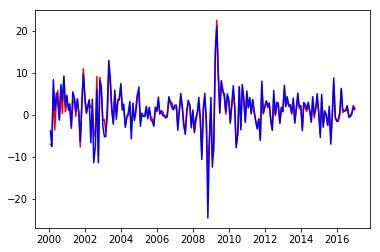

In [84]:
plt.plot(xaxis, yaxis1, 'r', xaxis, yaxis2, 'b')
plt.show()

### *show two returns seperately*

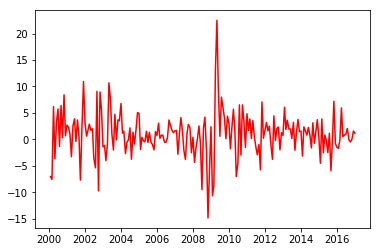

In [85]:
plt.plot(xaxis, yaxis1, 'r')

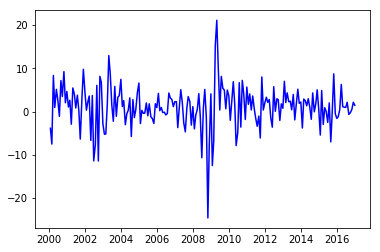

In [86]:
plt.plot(xaxis, yaxis2, 'b')

In [87]:
new_yaxis1 = yaxis1.map(lambda x: x/100+1)
new_yaxis1.head()

0    0.929787
1    0.924485
2    1.061881
3    0.963785
4    1.032727
Name: original_monthly_return, dtype: float64

### *Show comproducted returns*

In [88]:
cumprod_original = np.cumprod(new_yaxis1, axis=0)
cumprod_original.tail()

199    6.049349
200    6.020009
201    6.022677
202    6.118698
203    6.190089
Name: original_monthly_return, dtype: float64

In [89]:
new_yaxis2 = yaxis2.map(lambda x: x/100+1)
new_yaxis2.head()

0    0.961487
1    0.924975
2    1.083462
3    1.009659
4    1.051489
Name: replicated_monthly_return, dtype: float64

In [90]:
cumprod_replicated = np.cumprod(new_yaxis2, axis=0)
cumprod_replicated.tail()

199    7.142840
200    7.123356
201    7.157364
202    7.311158
203    7.417823
Name: replicated_monthly_return, dtype: float64

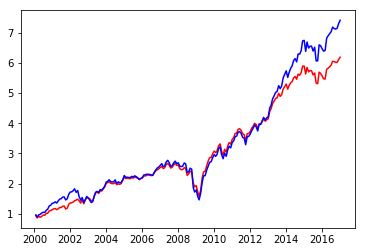

In [91]:
plt.plot(xaxis, cumprod_original, 'r', xaxis, cumprod_replicated, 'b')
plt.show()

## *Results*

**replicated portfolio follows similar shape of YACKX, but slightly higher than YACKX**

## *calcuate fama-french 3 factors*

In [92]:
sliced_fama_french = fama_french[:-12]
sliced_fama_french.tail()

,Mkt-RF,SMB,HML,RF
2016-08-01,0.50,1.17,3.34,0.02
2016-09-01,0.25,2.01,-1.49,0.02
2016-10-01,-2.02,-4.36,4.16,0.02
2016-11-01,4.86,5.48,8.27,0.01
2016-12-01,1.82,0.08,3.61,0.03


### *replicated & original portfolios return - risk free*

In [93]:
comparing_two_portfolios['orginal_mret_risk_free'] = comparing_two_portfolios['original_monthly_return']-sliced_fama_french.loc[:,'RF'].reset_index(drop=True)
comparing_two_portfolios['replicated_mret_risk_free'] = comparing_two_portfolios['replicated_monthly_return']-sliced_fama_french.loc[:,'RF'].reset_index(drop=True)


### *Preparing Regression for two portfolios*

In [94]:
original_df = array_to_dataframe(comparing_two_portfolios['orginal_mret_risk_free'], sliced_fama_french['Mkt-RF'], sliced_fama_french['SMB'], sliced_fama_french['HML'])
replicated_df = array_to_dataframe(comparing_two_portfolios['replicated_monthly_return'], sliced_fama_french['Mkt-RF'], sliced_fama_french['SMB'], sliced_fama_french['HML'])


### *Do Regression for two portfolios*

In [95]:
ff_3factor_reg_original = smf.ols('Excess_rt ~ Mkt_RF + SMB + HML',data=original_df).fit()
ff_3factor_reg_replicated = smf.ols('Excess_rt ~ Mkt_RF + SMB + HML',data=replicated_df).fit()

ff_3factor_reg_original.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Excess_rt   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     192.2
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           1.19e-58
Time:                        22:15:47   Log-Likelihood:                -442.02
No. Observations:                 204   AIC:                             892.0
Df Residuals:                     200   BIC:                             905.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4572      0.152      3.006      0.003       0.157       0.757
Mkt_RF         0.7904      0.035     22.675      0.000       0.722       0.859
SMB           -0.1089      0.047     -2.297      0.023      -0.202      -0.015
HML            0.3431      0.048      7.113      0.000       0.248       0.438
==============================================================================
Omnibus:                       89.096   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.294
Skew:                           1.638   Prob(JB):                     9.06e-97
Kurtosis:                       9.427   Cond. No.                         4.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Original YACKX
#### * Alpha: 0.4572 ---------- significant
#### * Beta(Mkt-Rf): 0.7904 ---------- significant
#### * Beta(SMB): -0.1089 ---------- significant
#### * Beta(HML): 0.3431 ---------- significant
#### * Adj. R-square: 0.739 

In [96]:
ff_3factor_reg_replicated.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Excess_rt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     206.7
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           5.20e-61
Time:                        22:15:48   Log-Likelihood:                -465.83
No. Observations:                 204   AIC:                             939.7
Df Residuals:                     200   BIC:                             952.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6696      0.171      3.917      0.000       0.332       1.007
Mkt_RF         0.9207      0.039     23.502      0.000       0.843       0.998
SMB           -0.2012      0.053     -3.777      0.000      -0.306      -0.096
HML            0.4104      0.054      7.572      0.000       0.303       0.517
==============================================================================
Omnibus:                       27.322   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.506
Skew:                           0.654   Prob(JB):                     1.46e-12
Kurtosis:                       5.168   Cond. No.                         4.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Replicated Portfolio
#### * Alpha: 0.6696 ---------- significant
#### * Beta(Mkt-Rf): 0.9207 ---------- significant
#### * Beta(SMB): -0.2012 ---------- significant
#### * Beta(HML): 0.4104 ---------- significant
#### * Adj. R-square: 0.752 

## *Results*

**The replicated portfolio shows better alpha and high R-square value.** 

**It means the replicated  portfolio is more like market portfolio and fits more to Fama-French 3 factor model.**